In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import  accuracy_score, f1_score, precision_score,confusion_matrix, recall_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving diabetes_data_upload.csv to diabetes_data_upload.csv


In [ ]:
import io
df = pd.read_csv('diabetes_data_upload.csv')
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive


In [ ]:
df.isna().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

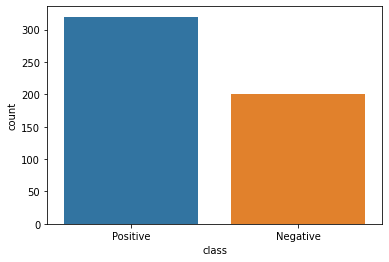

In [ ]:
import seaborn as sns
sns.countplot(df['class'],data=df)

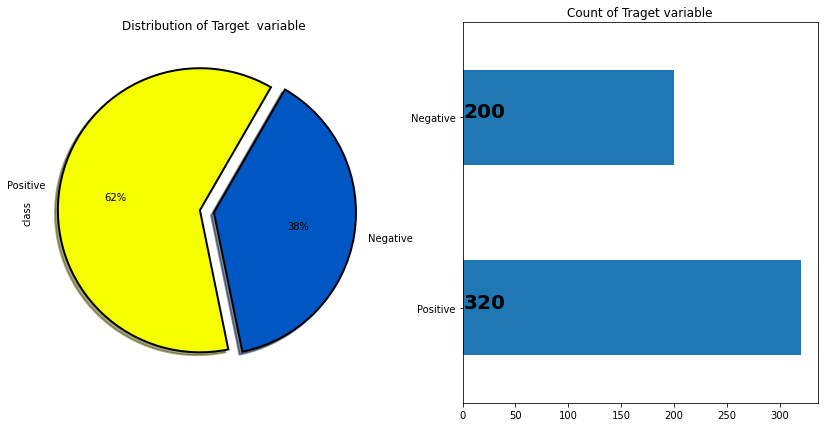

In [ ]:
# plotting to create pie chart and bar plot as subplots
plt.figure(figsize=(14,7))
plt.subplot(121)
df["class"].value_counts().plot.pie(autopct = "%1.0f%%",colors = sns.color_palette("prism",7),startangle = 60,labels=["Positive","Negative"],
wedgeprops={"linewidth":2,"edgecolor":"k"},explode=[.1,0],shadow =True)
plt.title("Distribution of Target  variable")

plt.subplot(122)
ax = df["class"].value_counts().plot(kind="barh")

for i,j in enumerate(df["class"].value_counts().values):
    ax.text(.7,i,j,weight = "bold",fontsize=20)

plt.title("Count of Traget variable")
plt.show()

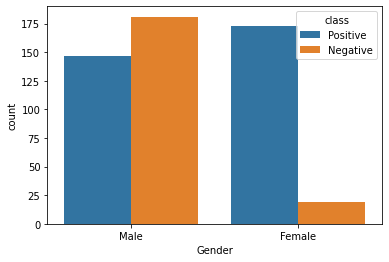

In [ ]:
import seaborn as sns
sns.countplot(df['Gender'],hue=df['class'], data=df)

In [ ]:
plot_criteria= ['Gender', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Gender,,
Female,9.500000,54.060000
Male,90.500000,45.940000


**Distribution of** **Polyuria**


# *Polyuria is defined as the frequent passage of large volumes of urine – more than 3 litres a day compared to the normal daily urine output in adults of about 1 to 2 litres.*
# Causes:
# *The most common cause of polyuria in both adults and children is uncontrolled diabetes mellitus, which causes osmotic diuresis, when glucose levels are so high that glucose is excreted in the urine. Water follows the glucose concentration passively, leading to abnormally high urine output.*

# *In the absence of diabetes mellitus, the most common causes are decreased secretion of aldosterone due to adrenal cortical tumor, primary polydipsia (excessive fluid drinking),*

In [ ]:
plot_criteria= ['Polyuria', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyuria,,
No,92.500000,24.060000
Yes,7.500000,75.940000


# **Distribution of Polydisipia**

#Polydipsia is the term given to excessive thirst and is one of the initial symptoms of diabetes. It is also usually accompanied by temporary or prolonged dryness of the mouth.However, if you feel thirsty all the time or your thirst is stronger than usual and continues even after you drink, it can be a sign that not all is well inside your body.Excessive thirst can be caused by high blood sugar (hyperglycemia), and is also one of the ‘Big 3’ signs of diabetes mellitus i.e.,
#1. Polyuria
#2. Polydipsia
#3. Polyphagia
#Generally, increased thirst (polydipsia) and an increased need to urinate (polyuria) will often come as a pair.

In [ ]:
plot_criteria= ['Polydipsia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polydipsia,,
No,96.000000,29.690000
Yes,4.000000,70.310000


# **Distribution of sudden weight loss**

In [ ]:
plot_criteria= ['sudden weight loss', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
sudden weight loss,,
No,85.500000,41.250000
Yes,14.500000,58.750000


# **`Distribution of weakness`**

In [ ]:
plot_criteria= ['weakness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
weakness,,
No,56.500000,31.870000
Yes,43.500000,68.120000


# ***Distribution of Polyphagia***

# Polyphagia, also known as hyperphagia, is the medical term for excessive or extreme hunger.It's different than having an increased appetite after exercise or other physical activity.While your hunger level will return to normal after eating in those cases, polyphagia won't go away if you eat more food

In [ ]:
plot_criteria= ['Polyphagia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Polyphagia,,
No,76.000000,40.940000
Yes,24.000000,59.060000


# Distribution of Visual Blurring

In [ ]:
plot_criteria= ['visual blurring', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)


class,Negative,Positive
visual blurring,,
No,71.000000,45.310000
Yes,29.000000,54.690000


# Itching

In [ ]:
plot_criteria= ['Itching', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Itching,,
No,50.500000,51.880000
Yes,49.500000,48.120000


# Irritability

In [ ]:
plot_criteria= ['Irritability', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Irritability,,
No,92.000000,65.620000
Yes,8.000000,34.380000


# Delayed Healing

In [ ]:
plot_criteria= ['delayed healing', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
delayed healing,,
No,57.000000,52.190000
Yes,43.000000,47.810000


# Partial Paresis

Paresis involves the weakening of a muscle or group of muscles. It may also be referred to as partial or mild paralysis. Unlike paralysis, people with paresis can still move their muscles. These movements are just weaker than normal.

In [ ]:
plot_criteria= ['partial paresis', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
partial paresis,,
No,84.000000,40.000000
Yes,16.000000,60.000000


# Muscle Stiffness

In [ ]:
plot_criteria= ['muscle stiffness', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
muscle stiffness,,
No,70.000000,57.810000
Yes,30.000000,42.190000


# Alopecia

# Sudden hair loss that starts with one or more circular bald patches that may overlap. Alopecia areata occurs when the immune system attacks hair follicles and may be brought on by severe stress. The main symptom is hair loss.

In [ ]:
plot_criteria= ['Alopecia', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Alopecia,,
No,49.500000,75.620000
Yes,50.500000,24.380000


# **Obesity**

In [ ]:
plot_criteria= ['Obesity', 'class']
cm = sns.light_palette("red", as_cmap=True)
(round(pd.crosstab(df[plot_criteria[0]], df[plot_criteria[1]], normalize='columns') * 100,2)).style.background_gradient(cmap = cm)

class,Negative,Positive
Obesity,,
No,86.500000,80.940000
Yes,13.500000,19.060000


# **DataPreprocessing**

In [ ]:
df['class'] = df['class'].apply(lambda x: 0 if x=='Negative' else 1)

In [ ]:
X= df.drop(['class'],axis=1)
y=df['class']

In [ ]:
obj = X.select_dtypes(include = "object").columns
print (obj)

Index(['Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss', 'weakness',
       'Polyphagia', 'Genital thrush', 'visual blurring', 'Itching',
       'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for f in obj:
    X[f] = le.fit_transform(X[f].astype(str))

print (X.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Age                 520 non-null    int64
 1   Gender              520 non-null    int64
 2   Polyuria            520 non-null    int64
 3   Polydipsia          520 non-null    int64
 4   sudden weight loss  520 non-null    int64
 5   weakness            520 non-null    int64
 6   Polyphagia          520 non-null    int64
 7   Genital thrush      520 non-null    int64
 8   visual blurring     520 non-null    int64
 9   Itching             520 non-null    int64
 10  Irritability        520 non-null    int64
 11  delayed healing     520 non-null    int64
 12  partial paresis     520 non-null    int64
 13  muscle stiffness    520 non-null    int64
 14  Alopecia            520 non-null    int64
 15  Obesity             520 non-null    int64
dtypes: int64(16)
memory usage: 65.1 KB
None


In [ ]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


# **Correlation**

In [ ]:
X.corrwith(y)

Age                   0.108679
Gender               -0.449233
Polyuria              0.665922
Polydipsia            0.648734
sudden weight loss    0.436568
weakness              0.243275
Polyphagia            0.342504
Genital thrush        0.110288
visual blurring       0.251300
Itching              -0.013384
Irritability          0.299467
delayed healing       0.046980
partial paresis       0.432288
muscle stiffness      0.122474
Alopecia             -0.267512
Obesity               0.072173
dtype: float64

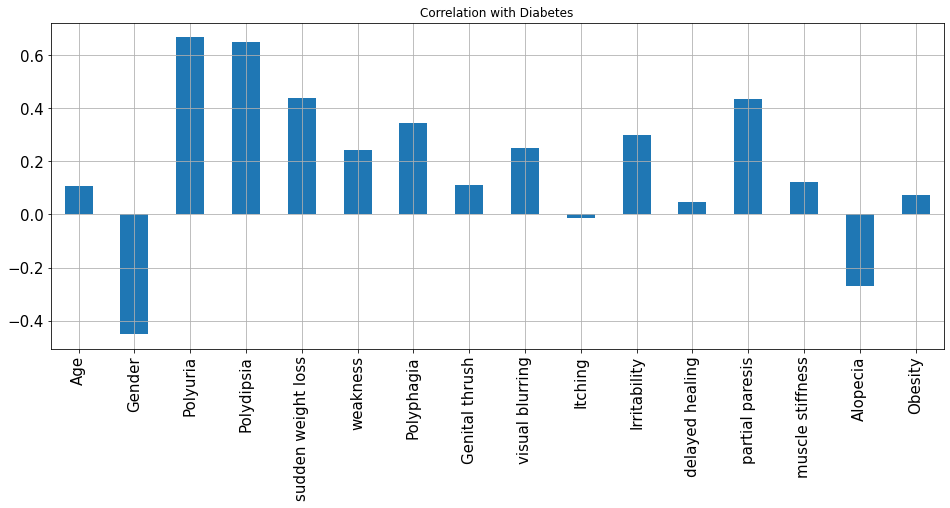

In [ ]:
X.corrwith(y).plot.bar(
        figsize = (16, 6), title = "Correlation with Diabetes", fontsize = 15,
        rot = 90, grid = True)

# **Train and Test Data**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,stratify=y, random_state = 1234)

In [ ]:
print('Distribution of traget variable in training set')
print(y_train.value_counts())
print('Distribution of traget variable in test set')
print(y_test.value_counts())

Distribution of traget variable in training set
1    256
0    160
Name: class, dtype: int64
Distribution of traget variable in test set
1    64
0    40
Name: class, dtype: int64


In [ ]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])
X_train.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
246,0.405405,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0
274,0.554054,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0
424,0.364865,1,1,1,1,1,0,1,0,0,0,0,0,0,0,0
316,0.527027,0,0,0,0,1,0,1,0,1,0,1,1,0,1,0
159,0.297297,0,1,1,1,1,1,0,1,1,1,1,1,1,0,0


Model Building

Logistic Regression

In [ ]:
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
from sklearn import model_selection
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

0.9181184668989548

In [ ]:
y_predict_logi = logi.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)
model_results = pd.DataFrame([['Logistic Regression',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results


,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.980769,0.975784,1.000000,0.96875,0.984127,0.984375
1,Logistic Regression,0.971154,0.918118,0.984127,0.96875,0.976378,0.971875


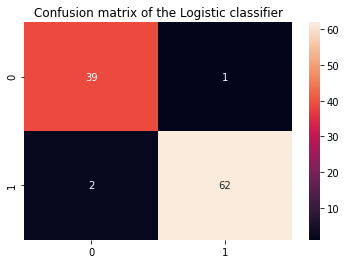

In [ ]:
cm_logi = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic classifier')
sns.heatmap(cm_logi,annot=True,fmt="d")
plt.show()

In [ ]:
TP = cm_logi[1,1] 
TN = cm_logi[0,0]
FP = cm_logi[0,1]
FN = cm_logi[1,0]
TN / float(TN+FP)

0.975

## **2 Random** **Forest**

In [ ]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
acc_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

0.9757839721254357

In [ ]:
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)
model_results = pd.DataFrame([['Random Forest',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.980769,0.975784,1.000000,0.96875,0.984127,0.984375
1,Logistic Regression,0.971154,0.918118,0.984127,0.96875,0.976378,0.971875
2,Random Forest,0.980769,0.975784,1.000000,0.96875,0.984127,0.984375


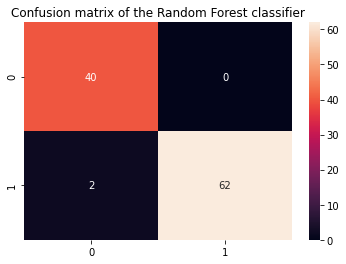

In [ ]:
cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest classifier')
sns.heatmap(cm_rf,annot=True,fmt="d")
plt.show()

In [ ]:
TP = cm_rf[1,1]
TN = cm_rf[0,0]
FP = cm_rf[0,1]
FN = cm_rf[1,0]
# Let us calculate specificity
TN / float(TN+FP)

1.0

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import cross_val_score

In [ ]:
hidden_units=100
learning_rate=0.01
hidden_layer_act='tanh'
output_layer_act='sigmoid'
no_epochs=200
x1=X_train
y1=y_train

In [ ]:
model = Sequential()
model.add(Dense(hidden_units, input_dim=16, activation=hidden_layer_act))
model.add(Dense(hidden_units, activation=hidden_layer_act))
model.add(Dense(1, activation=output_layer_act))
sgd=optimizers.SGD(lr=learning_rate)
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['acc'])


In [ ]:
model.fit(x1,y1,epochs=no_epochs, batch_size=len(x1),  verbose=2)

Epoch 1/200
1/1 - 16s - loss: 0.5994 - acc: 0.6923
Epoch 2/200
1/1 - 0s - loss: 0.5612 - acc: 0.6851
Epoch 3/200
1/1 - 0s - loss: 0.5292 - acc: 0.6947
Epoch 4/200
1/1 - 0s - loss: 0.5004 - acc: 0.7788
Epoch 5/200
1/1 - 0s - loss: 0.4738 - acc: 0.7861
Epoch 6/200
1/1 - 0s - loss: 0.4489 - acc: 0.8077
Epoch 7/200
1/1 - 0s - loss: 0.4260 - acc: 0.8389
Epoch 8/200
1/1 - 0s - loss: 0.4051 - acc: 0.8678
Epoch 9/200
1/1 - 0s - loss: 0.3862 - acc: 0.8750
Epoch 10/200
1/1 - 0s - loss: 0.3692 - acc: 0.8750
Epoch 11/200
1/1 - 0s - loss: 0.3539 - acc: 0.8846
Epoch 12/200
1/1 - 0s - loss: 0.3399 - acc: 0.8846
Epoch 13/200
1/1 - 0s - loss: 0.3271 - acc: 0.8894
Epoch 14/200
1/1 - 0s - loss: 0.3152 - acc: 0.8894
Epoch 15/200
1/1 - 0s - loss: 0.3043 - acc: 0.8918
Epoch 16/200
1/1 - 0s - loss: 0.2943 - acc: 0.8942
Epoch 17/200
1/1 - 0s - loss: 0.2852 - acc: 0.8966
Epoch 18/200
1/1 - 0s - loss: 0.2770 - acc: 0.8966
Epoch 19/200
1/1 - 0s - loss: 0.2696 - acc: 0.8966
Epoch 20/200
1/1 - 0s - loss: 0.2627 - 

In [ ]:
y_predict_a = model.predict(X_test)
y_predict_a= [int(round(x[0])) for x in y_predict_a]

In [ ]:

roc=roc_auc_score(y_test, y_predict_a)
acc = accuracy_score(y_test, y_predict_a)
prec = precision_score(y_test, y_predict_a)
rec = recall_score(y_test, y_predict_a)
f1 = f1_score(y_test, y_predict_a)
model_results1 = pd.DataFrame([['ANN',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results1, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.980769,0.975784,1.000000,0.968750,0.984127,0.984375
1,Logistic Regression,0.971154,0.918118,0.984127,0.968750,0.976378,0.971875
2,Random Forest,0.980769,0.975784,1.000000,0.968750,0.984127,0.984375
3,ANN,0.971154,0.975784,1.000000,0.953125,0.976000,0.976562


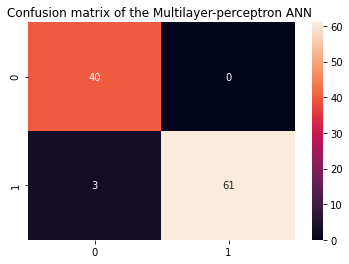

In [ ]:
cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Multilayer-perceptron ANN ')
sns.heatmap(cm_rf,annot=True,fmt="d")
plt.show()

# **Feature Selection**-**Top 10 Features**

In [ ]:
X.columns

Index(['Age', 'Gender', 'Polyuria', 'Polydipsia', 'sudden weight loss',
       'weakness', 'Polyphagia', 'Genital thrush', 'visual blurring',
       'Itching', 'Irritability', 'delayed healing', 'partial paresis',
       'muscle stiffness', 'Alopecia', 'Obesity'],
      dtype='object')

In [ ]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


# **filtering** **unwanted** **features**

In [ ]:
X_fs = X[['Polyuria', 'Polydipsia','Age', 'Gender','partial paresis','sudden weight loss','Irritability', 'delayed healing','Alopecia','Itching']]
X_fs


,Polyuria,Polydipsia,Age,Gender,partial paresis,sudden weight loss,Irritability,delayed healing,Alopecia,Itching
0,0,1,40,1,0,0,0,1,1,1
1,0,0,58,1,1,0,0,0,1,0
2,1,0,41,1,0,0,0,1,1,1
3,0,0,45,1,0,1,0,1,0,1
4,1,1,60,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...
515,1,1,39,0,1,1,0,1,0,1
516,1,1,48,0,1,1,1,1,0,1
517,1,1,58,0,1,1,0,0,0,0
518,0,0,32,0,0,0,0,1,1,1


# **Train Test Split**


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_fs, y, test_size = 0.2,stratify=y, random_state = 1234)

# **Data Normalization**

In [ ]:
minmax = MinMaxScaler()
X_train[['Age']] = minmax.fit_transform(X_train[['Age']])
X_test[['Age']] = minmax.transform(X_test[['Age']])

# **Model** **building**
# **Logistic** **Regression** - **Post** **Feature** **Selection**

In [ ]:
logi = LogisticRegression(random_state = 0, penalty = 'l2')
logi.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# **Cross Validation**

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
acc_logi = cross_val_score(estimator = logi, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_logi.mean()

0.8988385598141695

In [ ]:
y_predict_logi = logi.predict(X_test)
acc= accuracy_score(y_test, y_predict_logi)
roc=roc_auc_score(y_test, y_predict_logi)
prec = precision_score(y_test, y_predict_logi)
rec = recall_score(y_test, y_predict_logi)
f1 = f1_score(y_test, y_predict_logi)

model_results = pd.DataFrame([['Logistic Regression-Post FS',acc, acc_logi.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.980769,0.975784,1.000000,0.968750,0.984127,0.984375
1,Logistic Regression,0.971154,0.918118,0.984127,0.968750,0.976378,0.971875
2,Random Forest,0.980769,0.975784,1.000000,0.968750,0.984127,0.984375
3,ANN,0.971154,0.975784,1.000000,0.953125,0.976000,0.976562
4,Logistic Regression-Post FS,0.961538,0.898839,0.983871,0.953125,0.968254,0.964063


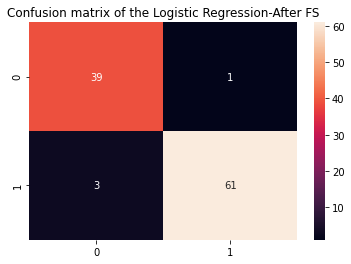

In [ ]:
cm_rf = confusion_matrix(y_test, y_predict_logi)
plt.title('Confusion matrix of the Logistic Regression-After FS')
sns.heatmap(cm_rf,annot=True,fmt="d")
plt.show()

# **Random Forest - Post Feature selection**

In [ ]:
rf = RandomForestClassifier(criterion='gini',n_estimators=100)
rf.fit(X_train,y_train)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

# **Cross-Validation**

In [ ]:
kfold = model_selection.KFold(n_splits=10, random_state=7)
scoring = 'accuracy'
acc_rf = cross_val_score(estimator = rf, X = X_train, y = y_train, cv = kfold,scoring=scoring)
acc_rf.mean()

0.9638211382113819

# **Model Evaluation**

In [ ]:
y_predict_r = rf.predict(X_test)
roc=roc_auc_score(y_test, y_predict_r)
acc = accuracy_score(y_test, y_predict_r)
prec = precision_score(y_test, y_predict_r)
rec = recall_score(y_test, y_predict_r)
f1 = f1_score(y_test, y_predict_r)

model_results = pd.DataFrame([['Random Forest- Post FS',acc, acc_rf.mean(),prec,rec, f1,roc]],
               columns = ['Model', 'Accuracy','Cross Val Accuracy', 'Precision', 'Recall', 'F1 Score','ROC'])
results = results.append(model_results, ignore_index = True)
results

,Model,Accuracy,Cross Val Accuracy,Precision,Recall,F1 Score,ROC
0,Random Forest,0.980769,0.975784,1.000000,0.968750,0.984127,0.984375
1,Logistic Regression,0.971154,0.918118,0.984127,0.968750,0.976378,0.971875
2,Random Forest,0.980769,0.975784,1.000000,0.968750,0.984127,0.984375
3,ANN,0.971154,0.975784,1.000000,0.953125,0.976000,0.976562
4,Logistic Regression-Post FS,0.961538,0.898839,0.983871,0.953125,0.968254,0.964063
5,Random Forest- Post FS,0.990385,0.963821,1.000000,0.984375,0.992126,0.992188


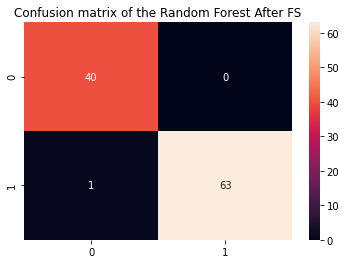

In [ ]:
cm_rf = confusion_matrix(y_test, y_predict_r)
plt.title('Confusion matrix of the Random Forest After FS')
sns.heatmap(cm_rf,annot=True,fmt="d")
plt.show()

In [ ]:
TP = cm_rf[1,1]
TN = cm_rf[0,0]
FP = cm_rf[0,1]
FN = cm_rf[1,0]
# Let us calculate specificity
TN / float(TN+FP)

0.975

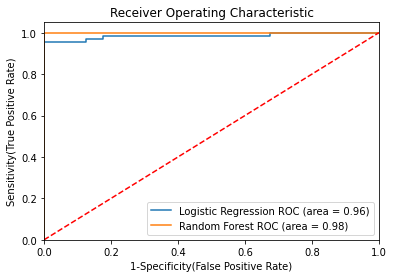

In [ ]:
from sklearn import metrics
import matplotlib.pyplot as plt
plt.figure()
# Add the models to the list that you want to view on the ROC plot
models = [
{
    'label': 'Logistic Regression',
    'model': LogisticRegression(random_state = 0, penalty = 'l2'),
},

    {
    'label': 'Random Forest',
    'model': RandomForestClassifier(n_estimators = 100,criterion='gini', random_state = 47),
},
    
]
# Below for loop iterates through your models list
for m in models:
    model = m['model'] # select the model
    model.fit(X_train, y_train) # train the model
    y_pred=model.predict(X_test) # predict the test data
# Compute False postive rate, and True positive rate
    fpr, tpr, thresholds = metrics.roc_curve(y_test, model.predict_proba(X_test)[:,1])
# Calculate Area under the curve to display on the plot
    auc = metrics.roc_auc_score(y_test,model.predict(X_test))
# Now, plot the computed values
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (m['label'], auc))
# Custom settings for the plot 
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('1-Specificity(False Positive Rate)')
plt.ylabel('Sensitivity(True Positive Rate)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


In [ ]:
saved_model = pickle.dumps(rf)
mymodel=pickle.loads(saved_model)
mymodel.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
from sklearn.externals import joblib
joblib.dump(rf, 'filename.pkl')
mymodel= joblib.load('filename.pkl')
mymodel.predict(X_test)





array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
from sklearn.externals import joblib
joblib.dump(logi, 'filename2.pkl')
mymodel= joblib.load('filename2.pkl')
mymodel.predict(X_test)




array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1])

In [ ]:
joblib.dump(model, 'filename1.pkl')
mymodel1= joblib.load('filename1.pkl')
mymodel1.predict(X_test)

array([0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1])